Results from replication of ITU study on breastdata

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
current_directory = os.environ['HOME']
image_size = 256

# Mei Pretrained on RadImageNet

## Training summary:

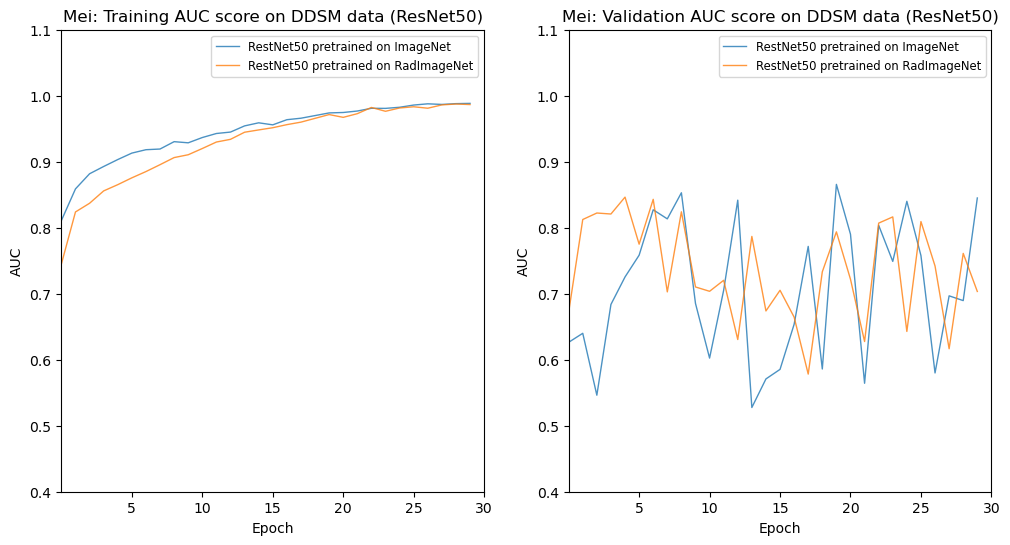

In [3]:
#Mei
#ImageNet
ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreImgNet/training_history/Eks2_Mei_ResNet50_ImgNet.csv")
ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)

#RadImageNet
RadImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreRadNet/training_history/Eks2_Mei_ResNet50_RadNet.csv")
RadImgNetLoss_df = pd.read_csv(RadImgNetLoss_path)

#Training:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
_xlim = [0.001,30]
_ylim = [0.4,1.1]
ax1.plot(ImgNetLoss_df['train_auc'],
        label=r"RestNet50 pretrained on ImageNet",
        lw=1,
        alpha=0.8,
        )
ax1.plot(RadImgNetLoss_df['train_auc'],
        label=r"RestNet50 pretrained on RadImageNet",
        lw=1,
        alpha=0.8,
        )

ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'AUC',
        title = 'Mei: Training AUC score on DDSM data (ResNet50)',
    )
ax1.legend(loc="best",fontsize='small')

#Validation:
ax2.plot(ImgNetLoss_df['val_auc'],
        label=r"RestNet50 pretrained on ImageNet",
        lw=1,
        alpha=0.8,
        )

ax2.plot(RadImgNetLoss_df['val_auc'],
        label=r"RestNet50 pretrained on RadImageNet",
        lw=1,
        alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'AUC',
        title = 'Mei: Validation AUC score on DDSM data (ResNet50)',
    )
ax2.legend(loc="best",fontsize='small')

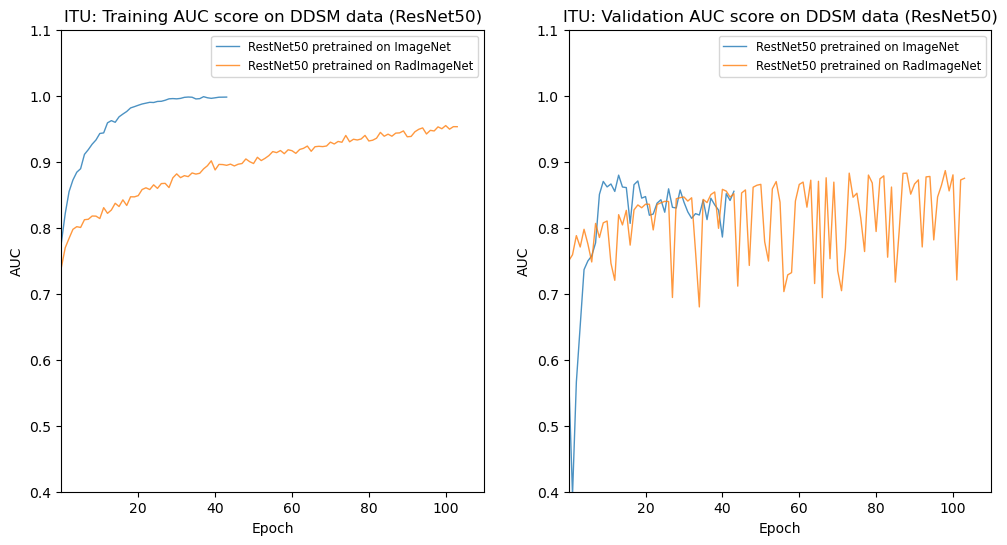

In [4]:
#ITU
#ImageNet
ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/pretrained_ImgNet/freezing_round2/pretrained_ImageNet/training_history/Eks2_ITU_ResNet50_ImgNet_round2.csv")
ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)

#RadImageNet
RadImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/pretrained_RadNet/freezing_round2/pretrained_RadNet/training_history/Eks2_ITU_ResNet50_RadNet_round2.csv")
RadImgNetLoss_df = pd.read_csv(RadImgNetLoss_path)

#Training:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
_xlim = [0.001,110]
_ylim = [0.4,1.1]
ax1.plot(ImgNetLoss_df['train_auc'],
        label=r"RestNet50 pretrained on ImageNet",
        lw=1,
        alpha=0.8,
        )
ax1.plot(RadImgNetLoss_df['train_auc'],
        label=r"RestNet50 pretrained on RadImageNet",
        lw=1,
        alpha=0.8,
        )

ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'AUC',
        title = 'ITU: Training AUC score on DDSM data (ResNet50)',
        )
ax1.legend(loc="best",fontsize='small')

#Validation:
ax2.plot(ImgNetLoss_df['val_auc'],
        label=r"RestNet50 pretrained on ImageNet",
        lw=1,
        alpha=0.8,
        )

ax2.plot(RadImgNetLoss_df['val_auc'],
        label=r"RestNet50 pretrained on RadImageNet",
        lw=1,
        alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'AUC',
        title = 'ITU: Validation AUC score on DDSM data (ResNet50)',
        )
ax2.legend(loc="best",fontsize='small')

# Test

____________________________________________________________
Mei trainingstrategy for finetuning
Found 540 validated image filenames belonging to 2 classes.


2023-12-09 23:29:26.444405: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-09 23:29:56.871225: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-12-09 23:29:56.883538: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300000000 Hz


____________________________________________________________
ResNet50 pretrained on ImageNet performance on DDSM test set:
Correct: 418/540 (77.407%)   AUC: 0.872
____________________________________________________________
ResNet50 pretrained on RadImageNet performance on DDSM test set:
Correct: 418/540 (77.407%)   AUC: 0.867


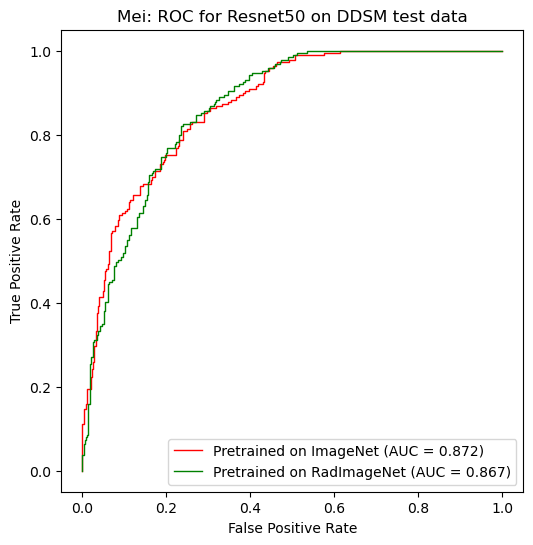

In [5]:
#Mei
print('____________________________________________________________')
print('Mei trainingstrategy for finetuning')

test_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Data/Datasplits/test_pocData.csv")
df_test=pd.read_csv(test_path)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
test_generator = data_generator.flow_from_dataframe(dataframe=df_test,
                                                    directory=current_directory,
                                                    x_col = 'filepath',
                                                    y_col = 'label',
                                                    target_size=(image_size, image_size),
                                                    batch_size=len(df_test),
                                                    shuffle=False,
                                                    seed=726,
                                                    class_mode='categorical')

# #ImageNet:
w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreImgNet/weights/Eks2_Mei_ResNet50_ImgNet.h5")
FT_model = load_model(w_path, compile=False)

y_probs = FT_model.predict(test_generator) #Probabilities
ylabels= test_generator.classes
imgNet_fpr, imgNet_tpr, _ = roc_curve(ylabels, y_probs[:, 1])#calculate roc curve    y_probs[:, 1] # keep probabilities for the positive outcome only
imgNet_auc = auc(imgNet_fpr, imgNet_tpr)# calculate auc
y_pred = tf.math.argmax(y_probs,1) #Predictions
predctions = tf.Variable(y_pred).numpy().tolist()
correct = sum(i == j for (i,j) in zip(predctions,ylabels))
print('____________________________________________________________')
print('ResNet50 pretrained on ImageNet performance on DDSM test set:')
print('Correct: '+str(correct)+'/'+str(len(ylabels))+' ('+str(round(correct/len(ylabels)*100,3))+'%)   AUC:',round(imgNet_auc,3))

del FT_model

#RadImageNet:
w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreRadNet/weights/Eks2_Mei_ResNet50_RadNet.h5")
FT_model = load_model(w_path, compile=False)

y_probs = FT_model.predict(test_generator) #Probabilities
ylabels= test_generator.classes
radNet_fpr, radNet_tpr, _ = roc_curve(ylabels, y_probs[:, 1])#y_probs)# calculate roc curve    y_probs[:, 1] # keep probabilities for the positive outcome only
radNet_auc = auc(radNet_fpr, radNet_tpr)# calculate auc
y_pred = tf.math.argmax(y_probs,1) #Predictions
predctions = tf.Variable(y_pred).numpy().tolist()
correct = sum(i == j for (i,j) in zip(predctions,ylabels))
print('____________________________________________________________')
print('ResNet50 pretrained on RadImageNet performance on DDSM test set:')
print('Correct: '+str(correct)+'/'+str(len(ylabels))+' ('+str(round(correct/len(ylabels)*100,3))+'%)   AUC:',round(radNet_auc,3))

#Hold values for later plot:
mei_imgNet_tpr = imgNet_tpr
mei_imgNet_fpr = imgNet_fpr
mei_imgNet_auc = imgNet_auc
mei_radNet_tpr = radNet_tpr
mei_radNet_fpr = radNet_fpr
mei_radNet_auc = radNet_auc

#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    imgNet_fpr,
    imgNet_tpr,
    color="r",
    label=r"Pretrained on ImageNet (AUC = %0.3f)" % (imgNet_auc),
    lw=1,
    alpha=1,
)
ax.plot(
    radNet_fpr,
    radNet_tpr,
    color="g",
    label=r"Pretrained on RadImageNet (AUC = %0.3f)" % (radNet_auc),
    lw=1,
    alpha=1,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mei: ROC for Resnet50 on DDSM test data",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

____________________________________________________________
ITU training strategy for finetuning
Found 540 validated image filenames belonging to 2 classes.


____________________________________________________________
ResNet50 pretrained on ImageNet performance on DDSM test set:
Correct: 493/540 (91.296%)   AUC: 0.971
____________________________________________________________
ResNet50 pretrained on RadImageNet performance on DDSM test set:
Correct: 420/540 (77.778%)   AUC: 0.859


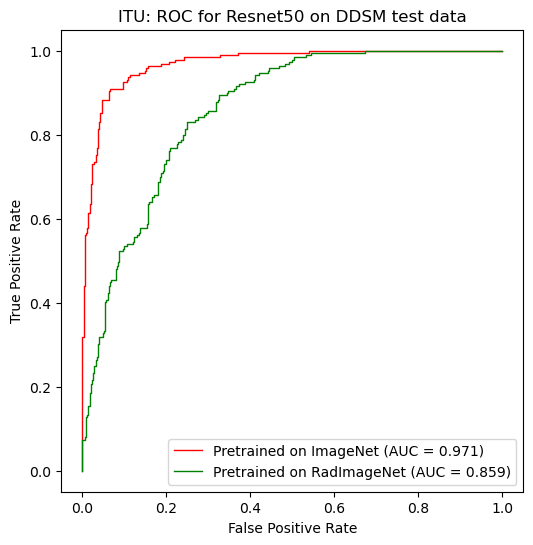

In [6]:
#ITU
print('____________________________________________________________')
print('ITU training strategy for finetuning')

test_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Data/Datasplits/test_pocData.csv")
df_test=pd.read_csv(test_path)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
test_generator = data_generator.flow_from_dataframe(dataframe=df_test,
                                                    directory=current_directory,
                                                    x_col = 'filepath',
                                                    y_col = 'label',
                                                    target_size=(image_size, image_size),
                                                    batch_size=len(df_test),
                                                    shuffle=False,
                                                    seed=726,
                                                    class_mode='categorical')

#ImageNet:
w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/pretrained_ImgNet/freezing_round2/pretrained_ImageNet/weights/Eks2_ITU_ResNet50_ImgNet_round2.h5")
FT_model = load_model(w_path, compile=False)

y_probs = FT_model.predict(test_generator) #Probabilities
ylabels= test_generator.classes
imgNet_fpr, imgNet_tpr, _ = roc_curve(ylabels, y_probs[:, 1])#calculate roc curve    y_probs[:, 1] # keep probabilities for the positive outcome only
imgNet_auc = auc(imgNet_fpr, imgNet_tpr)# calculate auc
y_pred = tf.math.argmax(y_probs,1) #Predictions
predctions = tf.Variable(y_pred).numpy().tolist()
correct = sum(i == j for (i,j) in zip(predctions,ylabels))
print('____________________________________________________________')
print('ResNet50 pretrained on ImageNet performance on DDSM test set:')
print('Correct: '+str(correct)+'/'+str(len(ylabels))+' ('+str(round(correct/len(ylabels)*100,3))+'%)   AUC:',round(imgNet_auc,3))

del FT_model

#RadImageNet:
w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/pretrained_RadNet/freezing_round2/pretrained_RadNet/weights/Eks2_ITU_ResNet50_RadNet_round2.h5")
FT_model = load_model(w_path, compile=False)

y_probs = FT_model.predict(test_generator) #Probabilities
ylabels= test_generator.classes
radNet_fpr, radNet_tpr, _ = roc_curve(ylabels, y_probs[:, 1])#y_probs)# calculate roc curve    y_probs[:, 1] # keep probabilities for the positive outcome only
radNet_auc = auc(radNet_fpr, radNet_tpr)# calculate auc
y_pred = tf.math.argmax(y_probs,1) #Predictions
predctions = tf.Variable(y_pred).numpy().tolist()
correct = sum(i == j for (i,j) in zip(predctions,ylabels))
print('____________________________________________________________')
print('ResNet50 pretrained on RadImageNet performance on DDSM test set:')
print('Correct: '+str(correct)+'/'+str(len(ylabels))+' ('+str(round(correct/len(ylabels)*100,3))+'%)   AUC:',round(radNet_auc,3))

#Hold values for later plot:
ITU_imgNet_tpr = imgNet_tpr
ITU_imgNet_fpr = imgNet_fpr
ITU_imgNet_auc = imgNet_auc
ITU_radNet_tpr = radNet_tpr
ITU_radNet_fpr = radNet_fpr
ITU_radNet_auc = radNet_auc

#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    imgNet_fpr,
    imgNet_tpr,
    color="r",
    label=r"Pretrained on ImageNet (AUC = %0.3f)" % (imgNet_auc),
    lw=1,
    alpha=1,
)
ax.plot(
    radNet_fpr,
    radNet_tpr,
    color="g",
    label=r"Pretrained on RadImageNet (AUC = %0.3f)" % (radNet_auc),
    lw=1,
    alpha=1,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ITU: ROC for Resnet50 on DDSM test data",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

# Plot with all 4 ROCs

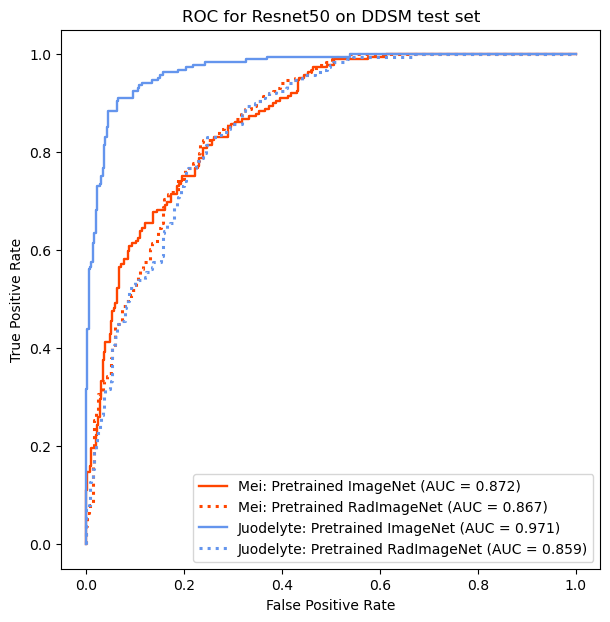

In [7]:
#Plot:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(
    mei_imgNet_fpr,
    mei_imgNet_tpr,
    color="orangered",
    label=r"Mei: Pretrained ImageNet (AUC = %0.3f)" % (mei_imgNet_auc),
    lw=1.7,
    alpha=1,
)
ax.plot(
    mei_radNet_fpr,
    mei_radNet_tpr,
    color="orangered",
    label=r"Mei: Pretrained RadImageNet (AUC = %0.3f)" % (mei_radNet_auc),
    lw=2.2,
    alpha=1,
    linestyle='dotted',
)
ax.plot(
    ITU_imgNet_fpr,
    ITU_imgNet_tpr,
    color="cornflowerblue",
    label=r"Juodelyte: Pretrained ImageNet (AUC = %0.3f)" % (ITU_imgNet_auc),
    lw=1.7,
    alpha=1,
)
ax.plot(
    ITU_radNet_fpr,
    ITU_radNet_tpr,
    color="cornflowerblue",
    label=r"Juodelyte: Pretrained RadImageNet (AUC = %0.3f)" % (ITU_radNet_auc),
    lw=2.2,
    alpha=1,
    linestyle='dotted',
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC for Resnet50 on DDSM test set",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()